In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

In [3]:
data = pd.read_excel("临床问卷数据1.xlsx").iloc[:, :15]

In [4]:
data.head()

,年龄,身高,体重,BMI,吸烟史,饮酒史,体育锻炼,腰背痛程度评分,VAS评分,椎间盘退变分数,Modic改变阴性椎体个数,Modic改变阳性椎体个数,许莫氏结节阴性椎体个数,许莫氏结节阳性椎体个数,睡眠量表得分
0,35,160,53,20.703125,无,无,≥1次/周,14,5,12,4,1,5,0,70
1,32,175,80,26.122449,有,有,≥1次/周,26,6,13,1,4,4,1,59
2,33,170,60,20.761246,无,无,无,7,3,14,2,3,4,1,57
3,28,175,83,27.102041,戒,有,＜1次/周,11,2,13,0,5,2,3,40
4,32,183,80,23.888441,戒,有,＜1次/周,10,2,9,0,5,3,2,51


In [5]:
data['吸烟史'].unique(), data['饮酒史'].unique(), data['体育锻炼'].unique()

(array(['无', '有', '戒'], dtype=object),
 array(['无', '有'], dtype=object),
 array(['≥1次/周', '无', '＜1次/周'], dtype=object))

In [6]:
data['吸烟史'] = data['吸烟史'].map({'无':0, '有':1, '戒':2})
data['饮酒史'] = data['饮酒史'].map({'无':0, '有':1})
data['体育锻炼'] = data['体育锻炼'].map({'≥1次/周':1, '无':0, '＜1次/周':2})
data.loc[data['椎间盘退变分数']<=10, ['椎间盘退变分数']] = 0
data.loc[data['椎间盘退变分数']>10, ['椎间盘退变分数']] = 1

In [7]:
data.head()

,年龄,身高,体重,BMI,吸烟史,饮酒史,体育锻炼,腰背痛程度评分,VAS评分,椎间盘退变分数,Modic改变阴性椎体个数,Modic改变阳性椎体个数,许莫氏结节阴性椎体个数,许莫氏结节阳性椎体个数,睡眠量表得分
0,35,160,53,20.703125,0,0,1,14,5,1,4,1,5,0,70
1,32,175,80,26.122449,1,1,1,26,6,1,1,4,4,1,59
2,33,170,60,20.761246,0,0,0,7,3,1,2,3,4,1,57
3,28,175,83,27.102041,2,1,2,11,2,1,0,5,2,3,40
4,32,183,80,23.888441,2,1,2,10,2,0,0,5,3,2,51


In [8]:
evening_data = data.loc[data['睡眠量表得分']<=42]
mid_data = data.loc[data['睡眠量表得分']>42]
mid_data = mid_data.loc[mid_data['睡眠量表得分']<58]
morning_data = data.loc[data['睡眠量表得分']>=58]
# morning_data = morning_data.reset_index()
# evening_data, mid_data, morning_data = pd.cut(x=data['睡眠量表得分'], bins=[0, 42, 58, ])

In [9]:
# morning_data.columns, mid_data.info(), evening_data.info()

In [36]:
# rc = {'axes.unicode_minus': False}
# sns.set(context='notebook', style='ticks', font='SimHei', rc=rc)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


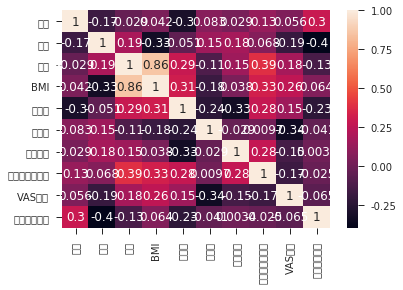

In [11]:
sns.heatmap(x.corr(), annot=True)
# x.corr()

# statistic 

In [10]:
x = morning_data[['年龄', '身高', '体重', 'BMI', '吸烟史', '饮酒史', '体育锻炼', '腰背痛程度评分', 'VAS评分', '睡眠量表得分']]
y = morning_data[['椎间盘退变分数']]

In [41]:
log_reg = sm.Logit(y, x)
log_reg.fit()

PerfectSeparationError: Perfect separation detected, results not available

<IPython.core.display.Javascript object>


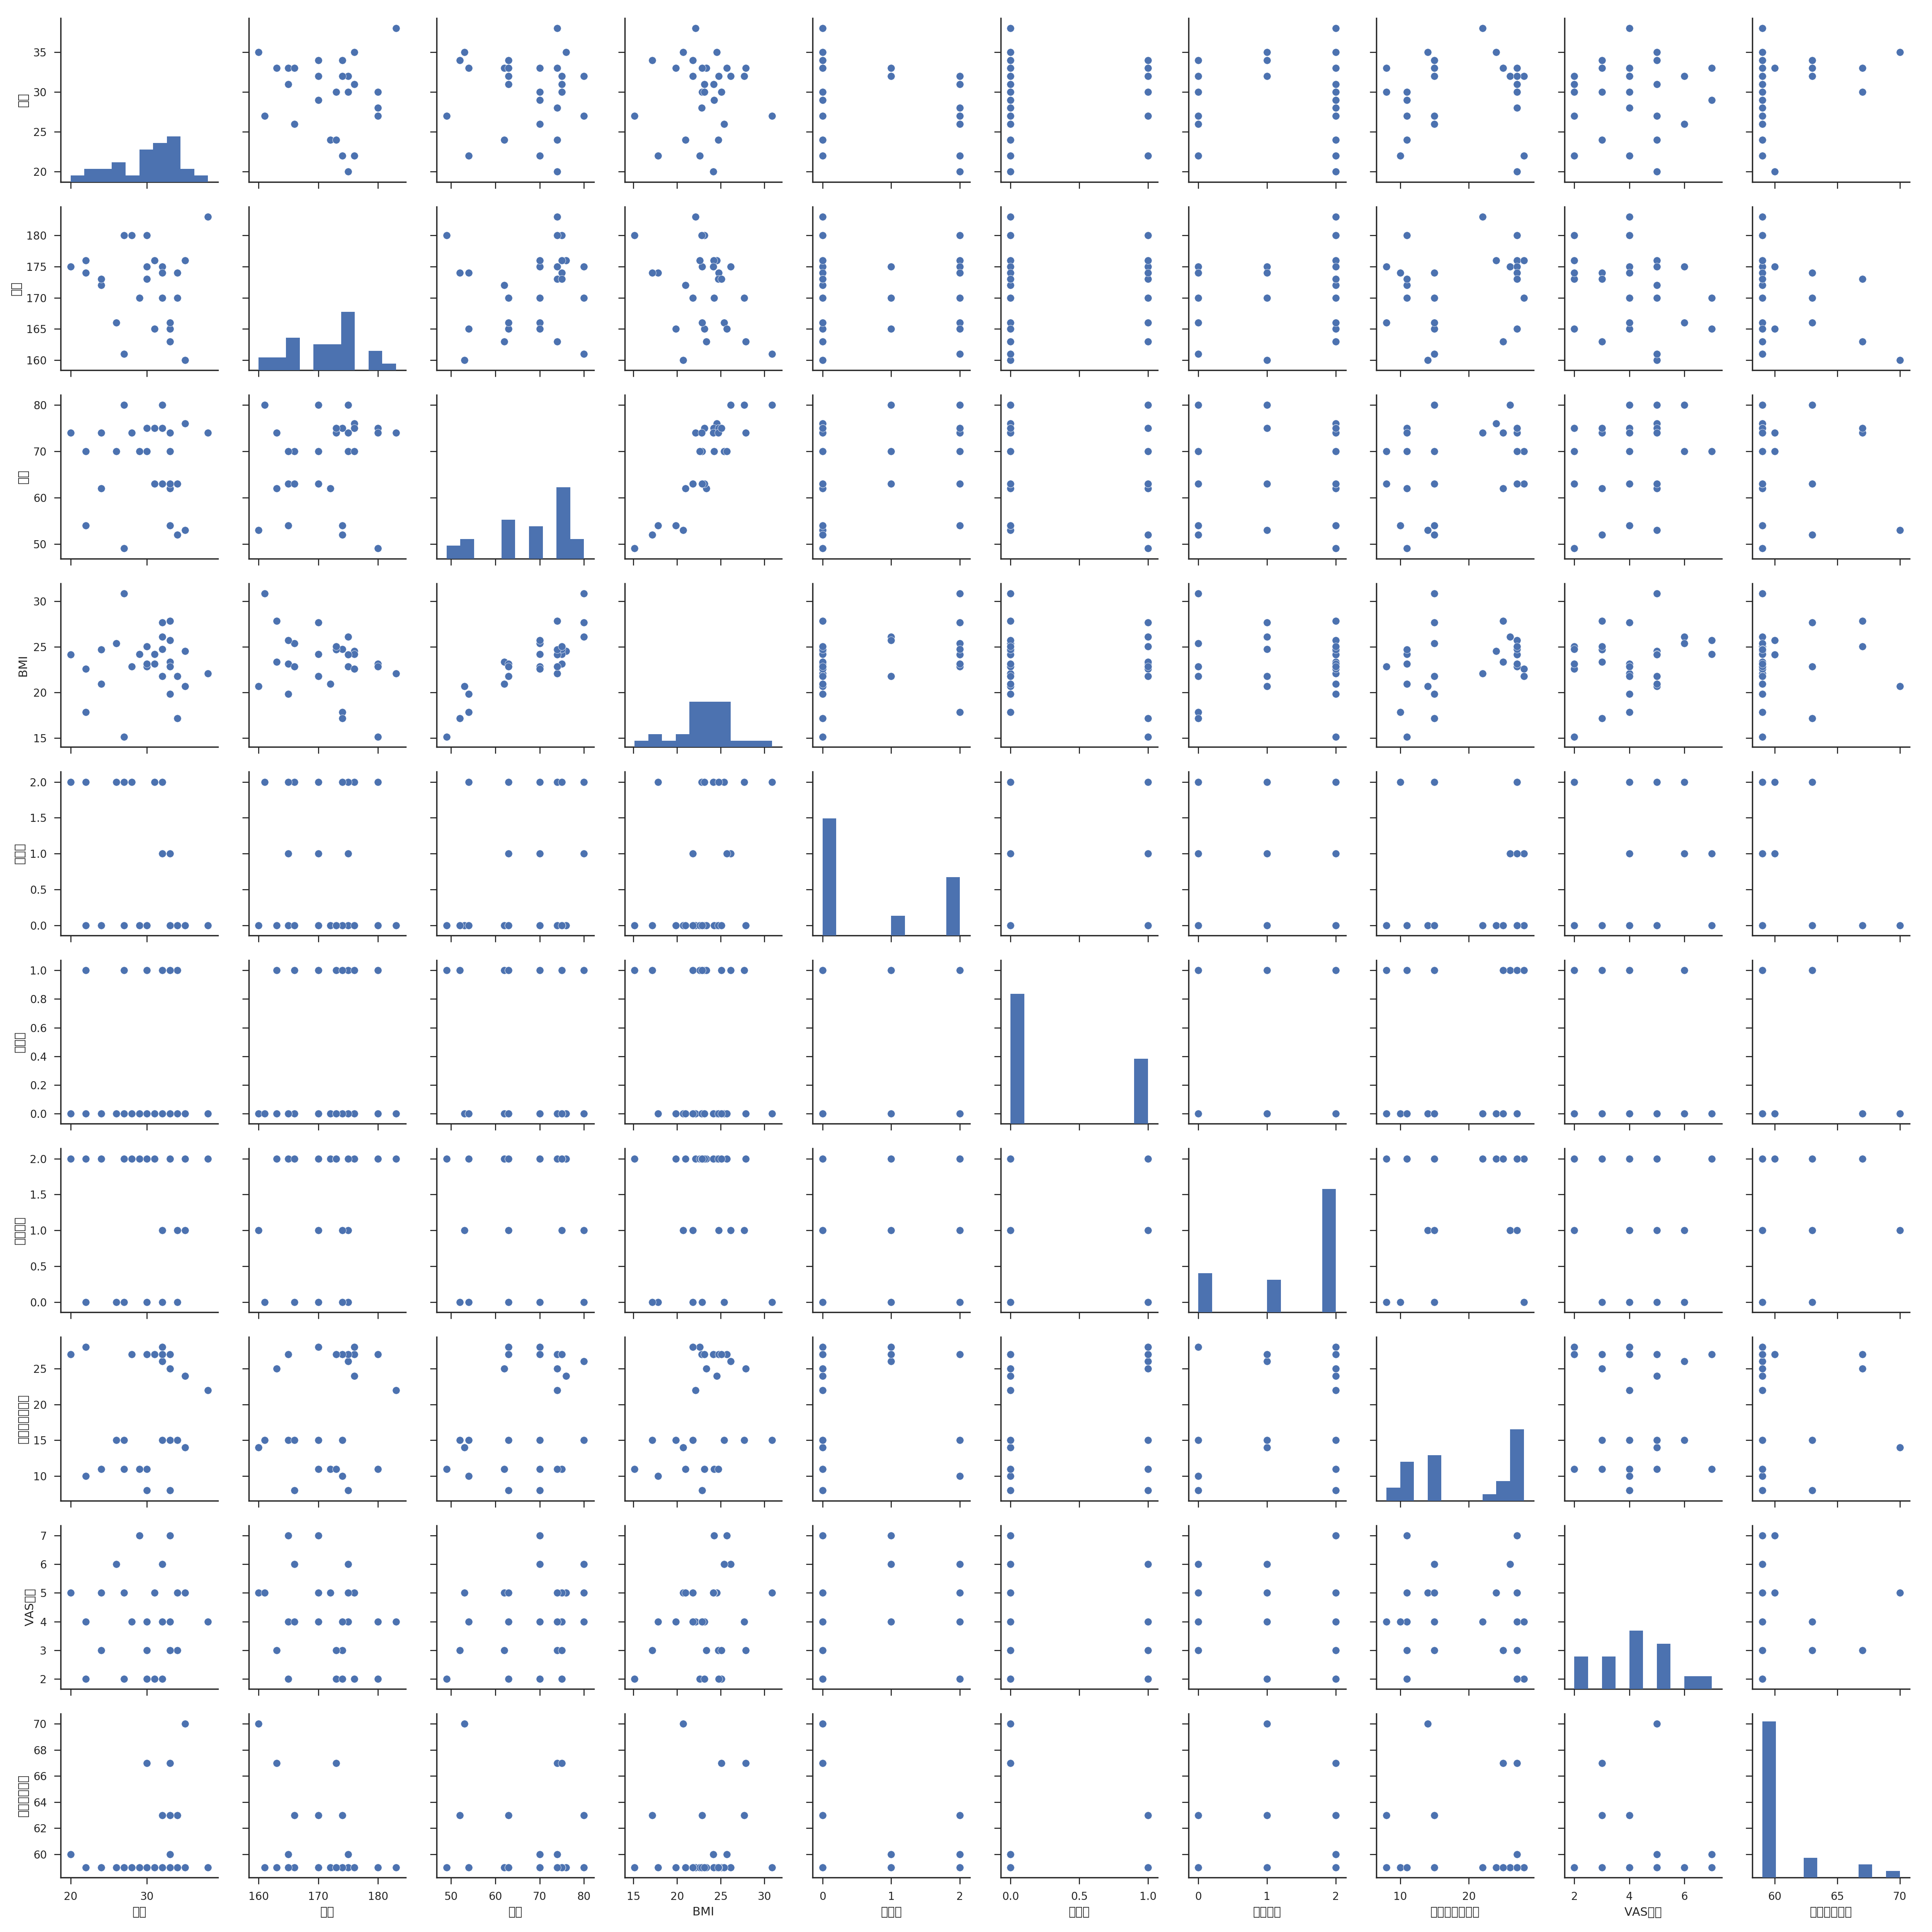

/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/michelle/anaconda3/lib/python3.7/site-packages/matplotlib/backe

In [49]:
sns.pairplot(x)

# logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x = evening_data.iloc[:, :9].join(evening_data.iloc[:, -1])
y = evening_data.iloc[:, 9]
x_test_mid = mid_data.iloc[:, :9].join(mid_data.iloc[:, -1])
y_test_mid = mid_data.iloc[:, 9]
x_test_morn = morning_data.iloc[:, :9].join(morning_data.iloc[:, -1])
y_test_morn = morning_data.iloc[:, 9]

In [ ]:
log_eve=LogisticRegression()
log_eve.fit(x, y)
print('evening as baseline')
print('morining corelation r^2: ',log_eve.score(x_test_morn, y_test_morn),'\nmid corelation r^2: ',\
      log_eve.score(x_test_mid, y_test_mid), '\n截距b：', log_eve.intercept_, '\n回归系数', log_eve.coef_)

In [ ]:
log_mid=LogisticRegression()
log_mid.fit(x_test_mid, y_test_mid)
print('mid as baseline')
print('morining corelation r^2: ',log_mid.score(x_test_morn, y_test_morn),'\nevening corelation r^2: ',\
      log_mid.score(x, y), '\n截距b：', log_mid.intercept_, '\n回归系数', log_mid.coef_)

In [ ]:
log_morn=LogisticRegression()
log_morn.fit(x_test_morn, y_test_morn)
print('morning as baseline')
print('mid corelation r^2: ',log_morn.score(x_test_mid, y_test_mid),'\nevening corelation r^2: ',\
      log_morn.score(x, y), '\n截距b：', log_morn.intercept_, '\n回归系数', log_morn.coef_)